## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

## Computer Set Up

In [2]:
!conda --version

conda 25.7.0


In [3]:
!git --version

git version 2.45.2


**Clone the Repo for our Class**

<a href="https://github.com/Redlands-DATA201/FALL25" target="_blank">Redlands-DATA201/FALL2025</a>

In [4]:
# # Depending on your setup you might need to install modules
# !conda install -y numpy
# !conda install -y pandas
# !conda install -y matplotlib
# !conda install -y plotly

In [5]:
# Some basic package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

# Review of DATA 101

For our review we are going to jump in and do some Exploratory Data Analysis (EDA) on a data set that we have seen before. This time you are just given a .csv file and your goal is to analyze it - answering these questions.

**I expect this to feel impossible at first!!!** but if you all work together, share code, and look things up as needed, I know you can do it!

#### This was a Homework Assignment in Data 101 - but see how much you can figure out on your own!

* Answer the following questions using reproducible Python code.
    - What does it mean to be reproducible? This means someone else at any time in the future can run and understand your code almost like reading a blog post.
* For each question, state your answer in a sentence, e.g. "In this sample, the first three common names of purchasers are ...".
* Note that the answers to all questions are within the context of this particular sample of sales, i.e. you shouldn't make inferences about the population of all Lego sales based on this sample.

0.  Read in the .csv file using Pandas and display it

1.  Describe what you see in the data set (variables, observations, etc)

2.  What are the three most common first names of purchasers?

3.  What are the three most common themes of Lego sets purchased?

4.  Among the most common theme of Lego sets purchased, what is the most common subtheme?

5.  Create data frames for each of the ages in the following categories: "18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT - use masks

6.  Which age group has purchased the highest number of Lego sets.

7.  Which age group has spent the most money on Legos?

8.  Which Lego theme has made the most money for Lego?

9.  Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. Then using a for loop calculate the average money spent per customer for each area code.

10.  Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

**This exersize comes from: https://datasciencebox.org/course-materials/hw-instructions/hw-05/hw-05-legos**

In [6]:
file_name = 'data/lego-sales.csv'

Question 1:

In [7]:
df = pd.read_csv("data/lego-sales.csv")
df.head()

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1


In [8]:
df.shape

(620, 14)

In [9]:
df.describe()

,age,set_id,year,pieces,us_price,quantity
count,620.000000,620.000000,620.0,551.000000,620.000000,620.000000
mean,34.356452,25124.982258,2018.0,254.206897,29.041613,1.437097
std,11.276537,506.760720,0.0,357.738804,34.630623,0.712849
min,16.000000,24548.000000,2018.0,13.000000,3.990000,1.000000
25%,25.000000,24724.750000,2018.0,70.000000,9.990000,1.000000
50%,33.000000,24804.500000,2018.0,114.000000,19.990000,1.000000
75%,41.000000,25640.250000,2018.0,313.000000,29.990000,2.000000
max,68.000000,26060.000000,2018.0,4634.000000,349.990000,5.000000


In [10]:
df.columns 

Index(['first_name', 'last_name', 'age', 'phone_number', 'set_id', 'number',
       'theme', 'subtheme', 'year', 'name', 'pieces', 'us_price', 'image_url',
       'quantity'],
      dtype='object')

Explanation: In this data set, I noticed that there are 14 variables and also 620 observations. Some of the data sets are age, year, price, peices, and quantity. I also noticed that some of the columns contain numbers that are inconsistent.

Question 2:

In [11]:
df['first_name']

0      Kimberly
1          Neel
2          Neel
3       Chelsea
4       Chelsea
         ...   
615      Talise
616     Spencer
617     Spencer
618      Amelia
619      Amelia
Name: first_name, Length: 620, dtype: object

In [12]:
top_names = df['first_name'].value_counts().head(3)
print(top_names)

first_name
Jackson    13
Jacob      11
Joseph     11
Name: count, dtype: int64


We see here that the three most common names are Jackson, Jacob, and Joseph.

Question 3:

In [13]:
top_sets = df['theme'].value_counts().head(3)
print(top_sets)

theme
Star Wars       75
Nexo Knights    64
Mixels          55
Name: count, dtype: int64


Here we use value counts to find the most common themes of the theme variable, and I used .head to only display the top three, which were Star Wars, Nexo Knights, and Mixels.

Question 4:

In [14]:
com_theme = "Star Wars"
mask = df['theme']==com_theme
df_com = df[mask].copy()
df_com['subtheme'].value_counts()

subtheme
The Force Awakens            15
Buildable Figures            11
Episode V                    10
MicroFighters                10
Battlefront                   7
Original Content              7
Episode III                   6
Seasonal                      3
Rebels                        3
Episode IV                    2
Ultimate Collector Series     1
Name: count, dtype: int64

In this question, we mask the theme variable in order to only look at sets under the Star Wars theme. Then we value count the subtheme of the masked section, and the most common subtheme was The Force Awakens.

Question 5 + 6:

In [15]:
df['age'] <= 18

0      False
1      False
2      False
3      False
4      False
       ...  
615     True
616    False
617    False
618    False
619    False
Name: age, Length: 620, dtype: bool

In [16]:
mask_under18 = (df['age'] <= 18)
mask_19_25 = (df['age'] >= 19) & (df['age'] <=25)
mask_26_35 = (df['age'] >= 26) & (df['age'] <=35)
mask_36_50 = (df['age'] >= 36) & (df['age'] <=50)
mask_50over = (df['age'] >= 50)

In [17]:
df_under18 = df[mask_under18].copy()
df_19_25 = df[mask_19_25].copy()
df_26_35 = df[mask_26_35].copy()
df_36_50 = df[mask_36_50].copy()
df_50over = df[mask_50over].copy()

In [18]:
print('under 18:')
print(df_under18['quantity'].sum())

print('19-25')
print(df_19_25['quantity'].sum())

print('26-35')
print(df_26_35['quantity'].sum())

print('36-50')
print(df_36_50['quantity'].sum())

print('over 50')
print(df_50over['quantity'].sum())

under 18:
45
19-25
174
26-35
267
36-50
313
over 50
112


36-50 age group purchased the most Lego sets at 313, while the 26-35 year olds purchased the second most at 267.

Question 7:

In [19]:
df['money_spent'] = df['us_price']*df['quantity']

In [20]:
df_under18 = df[mask_under18].copy()
df_19_25 = df[mask_19_25].copy()
df_26_35 = df[mask_26_35].copy()
df_36_50 = df[mask_36_50].copy()
df_50over = df[mask_50over].copy()

In [21]:
print('under 18:')
print(df_under18['money_spent'].sum())


print('19-25')
print(df_19_25['money_spent'].sum())

print('26-35')
print(df_26_35['money_spent'].sum())

print('36-50')
print(df_36_50['money_spent'].sum())

print('over 50')
print(df_50over['money_spent'].sum())

under 18:
948.5500000000001
19-25
4939.26
26-35
7576.33
36-50
9532.870000000003
over 50
3468.8799999999997


Consistent with the last section, the 36-50 year olds also spent the most money on Lego Sets, as they bought the most as well.

Question 8:

In [22]:
columns = ['theme','money_spent']
df[columns].groupby('theme').sum().sort_values('money_spent', ascending = False)

,money_spent
theme,
Star Wars,4447.83
Ninjago,2279.41
City,2211.35
Nexo Knights,2209.07
Minecraft,1549.90
Gear,1533.21
Friends,1279.44
Duplo,1219.50
Elves,1119.72


By selecting the theme and money spent columns, we can group the data by theme then sum up the columns, sorting the values so that we can see which one is at the top easily. Star Wars was at the top as the most money spent.

Question 9:

In [23]:
df['area_code'] = df['phone_number'].apply(lambda x: str(x).split('-')[0])
columns = ['area_code','money_spent']
df[columns].groupby('area_code').sum().sort_values('money_spent',ascending=False)

,money_spent
area_code,
nan,3992.64
956,719.96
973,684.91
567,549.86
281,464.90
...,...
216,9.99
509,9.99
308,9.99


In [24]:
counts = df['area_code'].value_counts()
counts

area_code
nan    92
281     9
712     9
567     9
441     9
       ..
509     1
419     1
787     1
520     1
402     1
Name: count, Length: 157, dtype: int64

In [25]:
spent = df[columns].groupby('area_code').sum().sort_values('money_spent', ascending = False)
average_spent = []
for c in counts.items():
    average_spent.append(spent.loc[c[0]]['money_spent']/c[1])
spent['average_spent'] = average_spent
spent.sort_values('average_spent',ascending=False)

,money_spent,average_spent
area_code,,
212,24.99,359.980000
246,59.97,169.980000
856,79.96,144.990000
573,79.94,124.990000
813,85.97,114.985000
...,...,...
710,111.93,8.323333
949,84.97,7.490000
802,79.98,5.490000


Unknown regions purchased the most Lego sets, but area code 956 had the highest amount for the known area codes. For the average money spent, the highest is in the area code 212.

Question 10:

Do LEGO sets with more pieces cost more money?

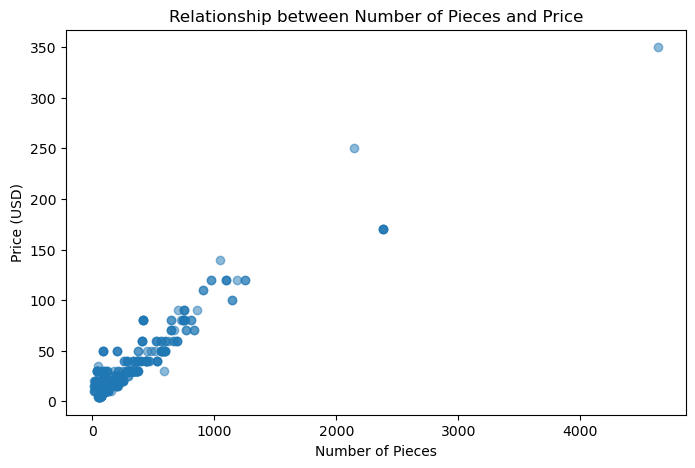

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(df['pieces'], df['us_price'], alpha=0.5)
plt.title("Relationship between Number of Pieces and Price")
plt.xlabel("Number of Pieces")
plt.ylabel("Price (USD)")
plt.show()

The scatter plot shows that the relationship between the number of pieces and the price. It shows that sets with more pieces trend in the direction of costing more. But it is not perfectly linear, as there are a number of other factors such as brand name also affect the price.